In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../DataOut/bus_trip_all_points.csv')

In [2]:
# import bus trips
bus_trips = pd.read_csv("../DataOut/bus_trips.csv")

In [3]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction
0,574733098,116,2021-10-16 08:03:04,7.293092,80.635573,9.17927,2021-10-16,08:03:04,POINT (184746.41595346577 232322.75960448402),BT01,2.0,1
1,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1
2,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1
3,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1
4,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
303224,585350956,1377,2021-10-27 19:02:53,7.290715,80.638227,5.39957,2021-10-27,19:02:53,POINT (185039.30275057122 232059.86188720367),NaN,1365.0,2
303225,585350957,1377,2021-10-27 19:03:08,7.291095,80.637743,8.09935,2021-10-27,19:03:08,POINT (184985.95129993305 232101.89901670374),NaN,1365.0,2
303226,585351802,1377,2021-10-27 19:03:23,7.291273,80.637273,5.39957,2021-10-27,19:03:23,POINT (184934.06182375905 232121.63129080654),NaN,1365.0,2
303227,585351803,1377,2021-10-27 19:03:38,7.291202,80.636218,18.89850,2021-10-27,19:03:38,POINT (184817.57099444696 232113.7373533016),NaN,1365.0,2


## feature Eng

### Add Acceleration

In [4]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'data' with columns: 'speed', 'devicetime', and 'trip_id'
# Convert the 'devicetime' column to pandas Timestamp if it's not already
data['devicetime'] = pd.to_datetime(data['devicetime'])

# Calculate time difference between consecutive rows within the same trip
data['time_diff'] = data.groupby('trip_id')['devicetime'].diff()

# Calculate change in speed between consecutive rows within the same trip
data['speed_diff'] = data.groupby('trip_id')['speed'].diff()

# Filter out rows with time differences close to zero
data = data[data['time_diff'].dt.total_seconds() > 0.001]  # Adjust the threshold as needed

# Calculate acceleration by dividing speed difference by time difference (avoiding division by zero)
data['acceleration'] = data['speed_diff'] / data['time_diff'].dt.total_seconds()

# Handle the case where time difference is zero or very close to zero, set acceleration to 0
data['acceleration'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['acceleration'].fillna(0, inplace=True)

print(data)


               id  deviceid          devicetime  latitude  longitude  \
1       574733099       116 2021-10-16 08:03:19  7.293068  80.636430   
2       574733100       116 2021-10-16 08:03:34  7.293043  80.637552   
3       574733101       116 2021-10-16 08:03:49  7.292725  80.637707   
4       574733102       116 2021-10-16 08:04:04  7.292292  80.637663   
5       574736662       116 2021-10-16 08:04:19  7.291640  80.637455   
...           ...       ...                 ...       ...        ...   
303224  585350956      1377 2021-10-27 19:02:53  7.290715  80.638227   
303225  585350957      1377 2021-10-27 19:03:08  7.291095  80.637743   
303226  585351802      1377 2021-10-27 19:03:23  7.291273  80.637273   
303227  585351803      1377 2021-10-27 19:03:38  7.291202  80.636218   
303228  585351804      1377 2021-10-27 19:03:53  7.291602  80.635130   

           speed        date      time  \
1       14.03890  2021-10-16  08:03:19   
2       10.25920  2021-10-16  08:03:34   
3        

C:\Users\gw\AppData\Local\Temp\ipykernel_13384\493667457.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acceleration'] = data['speed_diff'] / data['time_diff'].dt.total_seconds()
C:\Users\gw\AppData\Local\Temp\ipykernel_13384\493667457.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acceleration'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\gw\AppData\Local\Temp\ipykernel_13384\493667457.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [5]:
import pandas as pd

# Count Infinity values in each column
infinity_count = data.isin([np.inf, -np.inf]).sum()

print("Number of Infinity values in each column:")
print(infinity_count)


Number of Infinity values in each column:
id              0
deviceid        0
devicetime      0
latitude        0
longitude       0
speed           0
date            0
time            0
geometry        0
bus_stop        0
trip_id         0
direction       0
time_diff       0
speed_diff      0
acceleration    0
dtype: int64


In [6]:
# fill Nan values with 0
data['acceleration'].fillna(0, inplace=True)
# drop time_diff and speed_diff columns
data.drop(['time_diff', 'speed_diff'], axis=1, inplace=True)

C:\Users\gw\AppData\Local\Temp\ipykernel_13384\1802797475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acceleration'].fillna(0, inplace=True)
C:\Users\gw\AppData\Local\Temp\ipykernel_13384\1802797475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['time_diff', 'speed_diff'], axis=1, inplace=True)


In [7]:
# save to csv
data.to_csv('../DataOut/bus_trip_all_points_with_acceleration.csv', index=False)

In [8]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration
1,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,0.323975
2,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,-0.251980
3,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,-0.179987
4,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,-0.251980
5,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303224,585350956,1377,2021-10-27 19:02:53,7.290715,80.638227,5.39957,2021-10-27,19:02:53,POINT (185039.30275057122 232059.86188720367),NaN,1365.0,2,-0.431969
303225,585350957,1377,2021-10-27 19:03:08,7.291095,80.637743,8.09935,2021-10-27,19:03:08,POINT (184985.95129993305 232101.89901670374),NaN,1365.0,2,0.179985
303226,585351802,1377,2021-10-27 19:03:23,7.291273,80.637273,5.39957,2021-10-27,19:03:23,POINT (184934.06182375905 232121.63129080654),NaN,1365.0,2,-0.179985
303227,585351803,1377,2021-10-27 19:03:38,7.291202,80.636218,18.89850,2021-10-27,19:03:38,POINT (184817.57099444696 232113.7373533016),NaN,1365.0,2,0.899929


### Radial Acc

In [9]:
# from math import cos, radians, sqrt
# from pyproj import Proj, Transformer

# def lat_lon_to_utm(lat, lon):
#     # Create a UTM projection for the appropriate UTM zone (Zone 44N for Sri Lanka)
#     utm_zone = 44
#     utm_proj = Proj(proj='utm', zone=utm_zone, ellps='WGS84')

#     # Convert latitude and longitude to UTM coordinates
#     utm_easting, utm_northing = utm_proj(lon, lat)
#     return utm_easting, utm_northing
# # Calculate radius of curvature using OpenStreetMap API

# def calculate_radius_of_curvature(x1, y1, x2, y2, x3,y3):
#     x12 = x1 - x2;
#     x13 = x1 - x3;
 
#     y12 = y1 - y2;
#     y13 = y1 - y3;
 
#     y31 = y3 - y1;
#     y21 = y2 - y1;
 
#     x31 = x3 - x1;
#     x21 = x2 - x1;
 
#     # x1^2 - x3^2
#     sx13 = pow(x1, 2) - pow(x3, 2);
 
#     # y1^2 - y3^2
#     sy13 = pow(y1, 2) - pow(y3, 2);
 
#     sx21 = pow(x2, 2) - pow(x1, 2);
#     sy21 = pow(y2, 2) - pow(y1, 2);
    
#     denominator = 2 * ((y31) * (x12) - (y21) * (x13))
    
#     # Avoid division by zero
#     if denominator == 0:
#         return 0  # Or some other value you want to use
        
#     f = (((sx13) * (x12) + (sy13) *
#           (x12) + (sx21) * (x13) +
#           (sy21) * (x13)) // denominator)
             
#     g = (((sx13) * (y12) + (sy13) * (y12) +
#           (sx21) * (y13) + (sy21) * (y13)) //
#           (2 * ((x31) * (y12) - (x21) * (y13))));
 
#     c = (-pow(x1, 2) - pow(y1, 2) -
#          2 * g * x1 - 2 * f * y1);
 
#     # eqn of circle be x^2 + y^2 + 2*g*x + 2*f*y + c = 0
#     # where centre is (h = -g, k = -f) and
#     # radius r as r^2 = h^2 + k^2 - c
#     h = -g;
#     k = -f;
#     sqr_of_r = h * h + k * k - c;
 
#     # r is the radius
#     r = round(sqrt(sqr_of_r), 5);
#     return r
    

# # Calculate radial acceleration based on speed and radius of curvature
# def calculate_radial_acceleration(speed, radius_of_curvature):
#     if radius_of_curvature != 0:
#         radial_acceleration = speed**2 / radius_of_curvature
#     else:
#         radial_acceleration = 0
#     return radial_acceleration

# # Create a dictionary to store DataFrames for each trip ID
# trip_dataframes = {}
# window_size = 10  # Number of rows to use for calculating radius of curvature
# trips=data['trip_id'].unique()
# # Iterate over trip IDs to calculate radial acceleration for each trip's DataFrame
# for trip_id in trips:
#     trip_df = data[data["trip_id"] == trip_id].copy()  # Get DataFrame for the current trip
    
#     # Reset the index of trip_df only once
#     trip_df.reset_index(drop=True, inplace=True)
    
#     for i in range(window_size, len(trip_df) - window_size):
#         lat1, lon1 = trip_df.iloc[i - window_size]["latitude"], trip_df.iloc[i - window_size]["longitude"]
#         lat2, lon2 = trip_df.iloc[i]["latitude"], trip_df.iloc[i]["longitude"]
#         lat3, lon3 = trip_df.iloc[i + window_size]["latitude"], trip_df.iloc[i + window_size]["longitude"]
        
#         x1, y1 = lat_lon_to_utm(lat1, lon1)
#         x2, y2 = lat_lon_to_utm(lat2, lon2)
#         x3, y3 = lat_lon_to_utm(lat3, lon3)

#         radius_of_curvature = calculate_radius_of_curvature(x1, y1, x2, y2, x3, y3)
#         speed = trip_df.iloc[i]["speed"]

#         radial_acceleration = calculate_radial_acceleration(speed, radius_of_curvature)
#         trip_df.at[i, "radial_acceleration"] = radial_acceleration

#     trip_dataframes[trip_id] = trip_df  # Store the calculated DataFrame for the trip

# # Concatenate all trip-specific dataframes into one
# concatenated_df = pd.concat(trip_dataframes.values(), ignore_index=True)

# # Iterate through rows and assign radial acceleration values to the original dataframe
# for index, row in concatenated_df.iterrows():
#     data.loc[data['id'] == row['id'], 'radial_acceleration'] = row['radial_acceleration']

# print(data)

In [10]:
# trip_dataframes[30].head(20)

In [11]:
# fill Nan values with 0
# data['radial_acceleration'].fillna(0, inplace=True)

In [12]:
# data.to_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration.csv', index=False)

In [13]:
data = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration.csv')

In [14]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration,radial_acceleration
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,0.323975,0.0
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,-0.251980,0.0
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,-0.179987,0.0
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,-0.251980,0.0
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297117,585350956,1377,2021-10-27 19:02:53,7.290715,80.638227,5.39957,2021-10-27,19:02:53,POINT (185039.30275057122 232059.86188720367),NaN,1365.0,2,-0.431969,0.0
297118,585350957,1377,2021-10-27 19:03:08,7.291095,80.637743,8.09935,2021-10-27,19:03:08,POINT (184985.95129993305 232101.89901670374),NaN,1365.0,2,0.179985,0.0
297119,585351802,1377,2021-10-27 19:03:23,7.291273,80.637273,5.39957,2021-10-27,19:03:23,POINT (184934.06182375905 232121.63129080654),NaN,1365.0,2,-0.179985,0.0
297120,585351803,1377,2021-10-27 19:03:38,7.291202,80.636218,18.89850,2021-10-27,19:03:38,POINT (184817.57099444696 232113.7373533016),NaN,1365.0,2,0.899929,0.0


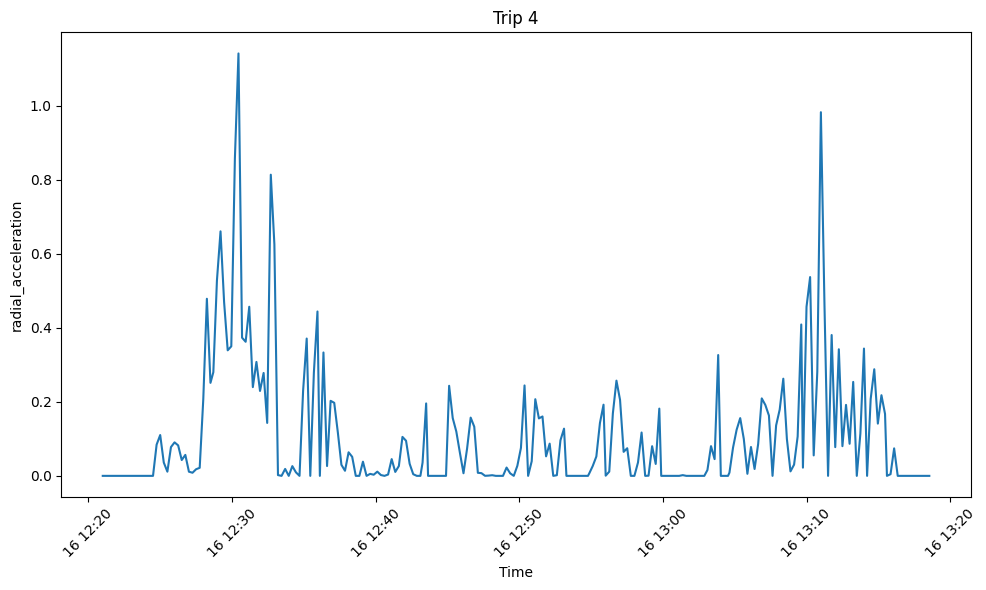

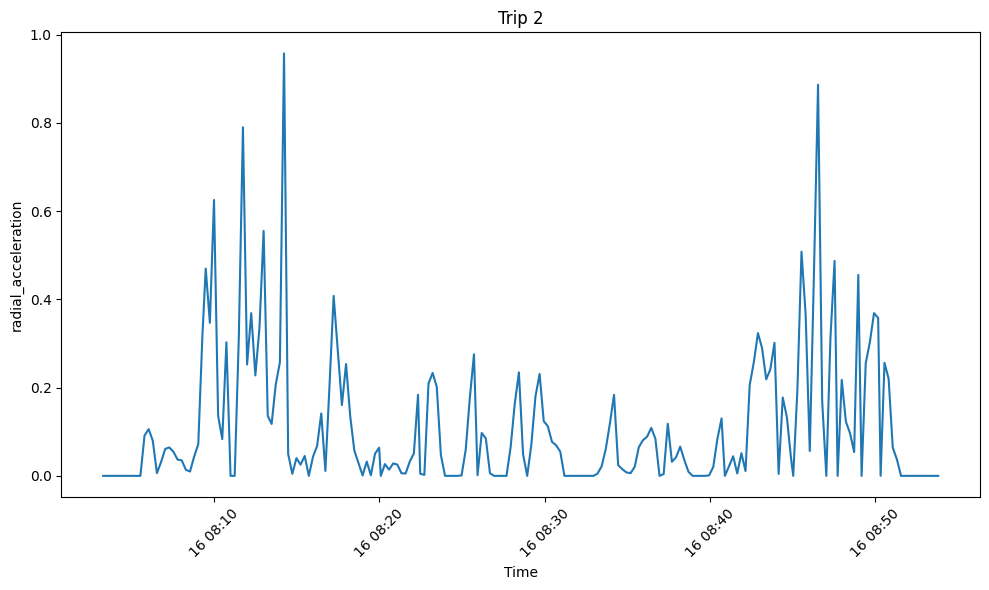

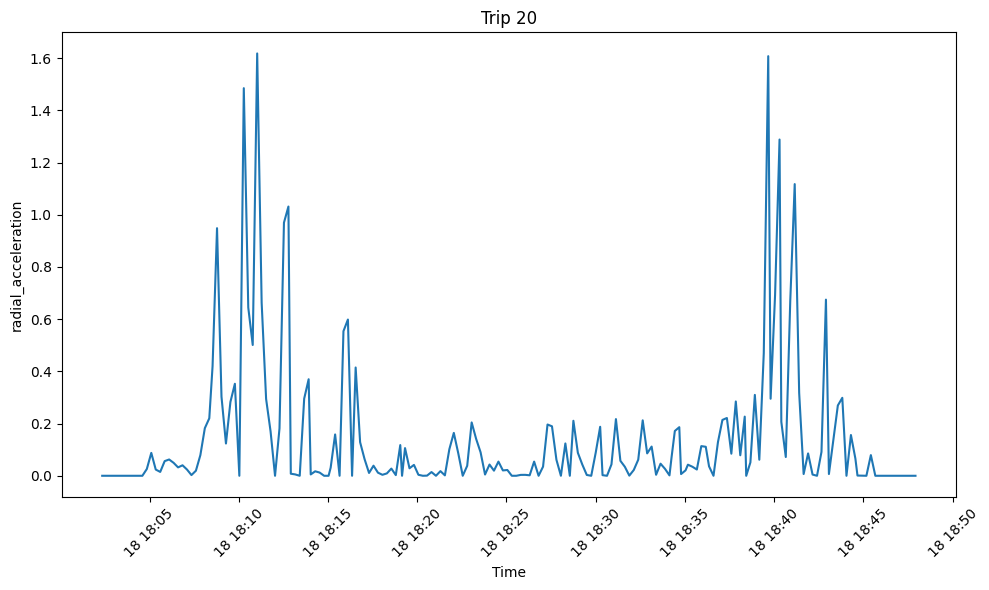

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have 'data' DataFrame containing bus data

# Convert 'devicetime' column to datetime
data['devicetime'] = pd.to_datetime(data['devicetime'])

# Draw a line graph of radial acceleration against time for a single trip
def draw_radial_acceleration_graph(trip_id):
    trip_df = data[data["trip_id"] == trip_id]
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(trip_df["devicetime"], trip_df["radial_acceleration"])
    plt.xlabel("Time")
    plt.ylabel("radial_acceleration")
    plt.title("Trip " + str(trip_id))
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout for better formatting
    plt.show()

draw_radial_acceleration_graph(4)
draw_radial_acceleration_graph(2)
draw_radial_acceleration_graph(20)


In [16]:
data.head(20)

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration,radial_acceleration
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,0.323975,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,-0.251980,0.000000
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,-0.179987,0.000000
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,-0.251980,0.000000
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971,0.000000
5,574736663,116,2021-10-16 08:04:34,7.291210,80.637713,8.63931,2021-10-16,08:04:34,POINT (184982.64260533327 232114.61697960715),101,2.0,1,-0.035997,0.000000
6,574736664,116,2021-10-16 08:04:49,7.290943,80.638160,0.00000,2021-10-16,08:04:49,POINT (185031.9565310351 232085.11003064158),101,2.0,1,-0.575954,0.000000
7,574736665,116,2021-10-16 08:05:04,7.290943,80.638157,0.00000,2021-10-16,08:05:04,POINT (185031.58111776915 232085.11014168937),101,2.0,1,0.000000,0.000000
8,574736666,116,2021-10-16 08:05:19,7.290943,80.638157,0.00000,2021-10-16,08:05:19,POINT (185031.58111776915 232085.11014168937),101,2.0,1,0.000000,0.000000
9,574736667,116,2021-10-16 08:05:34,7.290752,80.638305,6.47948,2021-10-16,08:05:34,POINT (185047.9605390529 232063.90664561786),101,2.0,1,0.431965,0.000000


### Distance from start

In [17]:

pip install osmnx


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Using path points

In [37]:
# # Choose a trip ID from the data DataFrame
# chosen_trip_id = 4

# # Get the longitude and latitude values for the chosen trip ID
# trip_data = data[data['trip_id'] == chosen_trip_id]
# point_path = list(zip(trip_data['latitude'], trip_data['longitude']))

In [38]:
# point_path

[(7.293085, 80.6356416),
 (7.2930783, 80.63601),
 (7.293025, 80.6366433),
 (7.2930183, 80.63739),
 (7.2928566, 80.6377516),
 (7.2925483, 80.6376883),
 (7.292095, 80.6375683),
 (7.2916766, 80.6375033),
 (7.2912083, 80.6376466),
 (7.2909533, 80.63814),
 (7.29095, 80.6381366),
 (7.2909333, 80.6381533),
 (7.2909333, 80.6381533),
 (7.2909333, 80.6381533),
 (7.2909333, 80.6381533),
 (7.2906666, 80.6384116),
 (7.2904133, 80.6388499),
 (7.290425, 80.6394266),
 (7.2903433, 80.6400166),
 (7.2907716, 80.6406699),
 (7.29073, 80.6412516),
 (7.2905149, 80.641855),
 (7.290355, 80.6421),
 (7.29012, 80.6425933),
 (7.28996, 80.6429983),
 (7.28964, 80.64335),
 (7.2892566, 80.6438166),
 (7.2890333, 80.64425),
 (7.288875, 80.6448716),
 (7.28838, 80.6453533),
 (7.28786, 80.6452866),
 (7.2873416, 80.6455116),
 (7.28775, 80.6461566),
 (7.2871416, 80.6469916),
 (7.28703, 80.64777),
 (7.2876966, 80.6474366),
 (7.2879816, 80.6472016),
 (7.288565, 80.6466049),
 (7.2894016, 80.646225),
 (7.2896066, 80.6454283),
 (

In [39]:
# import osmnx as ox
# import folium
# from shapely.geometry import LineString, Point

# # Convert the tuples to Shapely Point objects
# custom_path_points = [Point(lon, lat) for lon, lat in point_path]

# # Create a LineString geometry from the custom path points
# custom_path = LineString(custom_path_points)

# # Calculate the length of the custom path in meters
# custom_path_length = custom_path.length

# # Define the two locations (latitude, longitude)
# latitude1, longitude1 = (7.293085, 80.6356416)  # Example coordinates for location 1
# latitude2, longitude2 = (7.28418, 80.70211)  # Example coordinates for location 2

# # ... (the rest of your code remains the same)

# # Calculate the distance between each consecutive pair of points in the custom path
# custom_path_distances = [custom_path_points[i].distance(custom_path_points[i+1]) for i in range(len(custom_path_points)-1)]

# # Calculate the total distance along the custom path
# total_custom_distance = sum(custom_path_distances)

# print(f"Along-the-road distance along the custom path: {custom_road_distance:.2f} meters")
# print(f"Distance of the custom path itself: {custom_path_length:.2f} meters")

# # Visualize the custom route on a map using folium
# custom_route_nodes = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_route]
# m = folium.Map(location=(latitude1, longitude1), zoom_start=13)
# folium.PolyLine(locations=custom_route_nodes, color='blue').add_to(m)
# folium.Marker(location=(latitude1, longitude1), popup='Start').add_to(m)
# folium.Marker(location=(latitude2, longitude2), popup='End').add_to(m)

# # Display the map
# m.save('custom_route.html')  # Save the map as an HTML file
# m


Along-the-road distance along the custom path: 8732.68 meters
Distance of the custom path itself: 0.14 meters


#### try road names

In [ ]:
# pip install geopy


In [ ]:
# from geopy.geocoders import Nominatim

# # Example list of latitude and longitude values
# coordinates = path
# # Initialize the Nominatim geocoder
# geolocator = Nominatim(user_agent="road_name_lookup")

# road_names = []

# # Reverse geocode each coordinate to get road name
# for lat, lon in coordinates:
#     location = geolocator.reverse((lat, lon), exactly_one=True)
#     if location and 'address' in location.raw:
#         road_name = location.raw['address'].get('road')
#         if road_name:
#             road_names.append(road_name)

# print(road_names)


In [ ]:
# unique_roads=[]
# for road in road_names:
#     if road not in unique_roads:
#         unique_roads.append(road)

# print(unique_roads)

In [ ]:
# import osmnx as ox
# import folium

# # Define the two locations (latitude, longitude)
# latitude1, longitude1 = (7.293085, 80.6356416)  # Example coordinates for location 1
# latitude2, longitude2 = (7.28418, 80.70211)  # Example coordinates for location 2

# # Define a bounding box to cover a larger area around the locations
# north = max(latitude1, latitude2) + 0.01
# south = min(latitude1, latitude2) - 0.01
# east = max(longitude1, longitude2) + 0.01
# west = min(longitude1, longitude2) - 0.01

# # Specify the road names you want to include
# desired_road_names = unique_roads

# # Create a custom filter using the desired road names
# custom_filter = f'["name"~"{ "|".join(desired_road_names)}"]'

# # Retrieve the street network for the given bounding box with the custom filter
# G = ox.graph_from_bbox(north, south, east, west, network_type='all', custom_filter=custom_filter)

# # Calculate the nearest nodes to the specified locations
# node1 = ox.distance.nearest_nodes(G, longitude1, latitude1)
# node2 = ox.distance.nearest_nodes(G, longitude2, latitude2)

# # Calculate the shortest path between the nodes
# route = ox.shortest_path(G, node1, node2, weight='length')

# # Calculate the along-the-road distance
# road_distance = sum(ox.utils_graph.get_route_edge_attributes(G, route, 'length'))

# print(f"Along-the-road distance: {road_distance:.2f} meters")

# # Visualize the route on a map using folium
# route_nodes = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]
# m = folium.Map(location=(latitude1, longitude1), zoom_start=13)
# folium.PolyLine(locations=route_nodes, color='blue').add_to(m)
# folium.Marker(location=(latitude1, longitude1), popup='Start').add_to(m)
# folium.Marker(location=(latitude2, longitude2), popup='End').add_to(m)

# # Display the map
# m.save('along_the_road_route.html')  # Save the map as an HTML file
# m


In [ ]:
# desired_road_names = ['Sri Dalada Veediya', 'Sangaraja Mawatha', 'Mosque Road',"Weera Madduma Bandara Mawatha","Anagarika Dharmapala Mawatha","Kandy - Hewaheta Road","Kandy - Mahiyanganaya Road"]

#### Cumalative addition of distance

In [41]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'data' with columns: 'trip_id', 'latitude', 'longitude', and 'devicetime'
# Convert the 'devicetime' column to pandas Timestamp if it's not already
data['devicetime'] = pd.to_datetime(data['devicetime'])

# Function to calculate Haversine distance between two points
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # Earth's radius in meters
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    meters = R * c
    return meters

# Calculate the distance between consecutive rows within the same trip
data['distance'] = data.groupby('trip_id').apply(lambda group: haversine_distance(group['latitude'], group['longitude'], group['latitude'].shift(), group['longitude'].shift())).reset_index(level=0, drop=True)

# Calculate cumulative distance for each trip
data['cumulative_distance'] = data.groupby('trip_id')['distance'].cumsum()

print(data)


               id  deviceid          devicetime  latitude  longitude  \
0       574733099       116 2021-10-16 08:03:19  7.293068  80.636430   
1       574733100       116 2021-10-16 08:03:34  7.293043  80.637552   
2       574733101       116 2021-10-16 08:03:49  7.292725  80.637707   
3       574733102       116 2021-10-16 08:04:04  7.292292  80.637663   
4       574736662       116 2021-10-16 08:04:19  7.291640  80.637455   
...           ...       ...                 ...       ...        ...   
297117  585350956      1377 2021-10-27 19:02:53  7.290715  80.638227   
297118  585350957      1377 2021-10-27 19:03:08  7.291095  80.637743   
297119  585351802      1377 2021-10-27 19:03:23  7.291273  80.637273   
297120  585351803      1377 2021-10-27 19:03:38  7.291202  80.636218   
297121  585351804      1377 2021-10-27 19:03:53  7.291602  80.635130   

           speed        date      time  \
0       14.03890  2021-10-16  08:03:19   
1       10.25920  2021-10-16  08:03:34   
2        

In [43]:
# drop distance column and rename cumulative_distance to distance from start
data.drop(['distance'], axis=1, inplace=True)
data.rename(columns={'cumulative_distance': 'distance_from_start'}, inplace=True)


In [45]:
# fill nan with 0
data['distance_from_start'].fillna(0, inplace=True)

In [46]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration,radial_acceleration,distance_from_start
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1,0.323975,0.0,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,-0.251980,0.0,123.738485
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,-0.179987,0.0,163.044397
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,-0.251980,0.0,211.472339
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971,0.0,287.492821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297117,585350956,1377,2021-10-27 19:02:53,7.290715,80.638227,5.39957,2021-10-27,19:02:53,POINT (185039.30275057122 232059.86188720367),NaN,1365.0,2,-0.431969,0.0,15343.107522
297118,585350957,1377,2021-10-27 19:03:08,7.291095,80.637743,8.09935,2021-10-27,19:03:08,POINT (184985.95129993305 232101.89901670374),NaN,1365.0,2,0.179985,0.0,15411.129104
297119,585351802,1377,2021-10-27 19:03:23,7.291273,80.637273,5.39957,2021-10-27,19:03:23,POINT (184934.06182375905 232121.63129080654),NaN,1365.0,2,-0.179985,0.0,15466.630070
297120,585351803,1377,2021-10-27 19:03:38,7.291202,80.636218,18.89850,2021-10-27,19:03:38,POINT (184817.57099444696 232113.7373533016),NaN,1365.0,2,0.899929,0.0,15583.264936


In [49]:
# save as csv file 
data.to_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance.csv', index=False)

## Check whether the time or distance is better

In [61]:
# Draw a line graph of radial acceleration against time for a single trip
def drawAgainst(trip_id,columnx,columny):
    trip_df = data[data["trip_id"] == trip_id]
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(trip_df[f"{columnx}"], trip_df[f"{columny}"])
    plt.xlabel(f"{columnx}")
    plt.ylabel(f"{columny}")
    plt.title("Trip " + str(trip_id))
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout for better formatting
    plt.show()


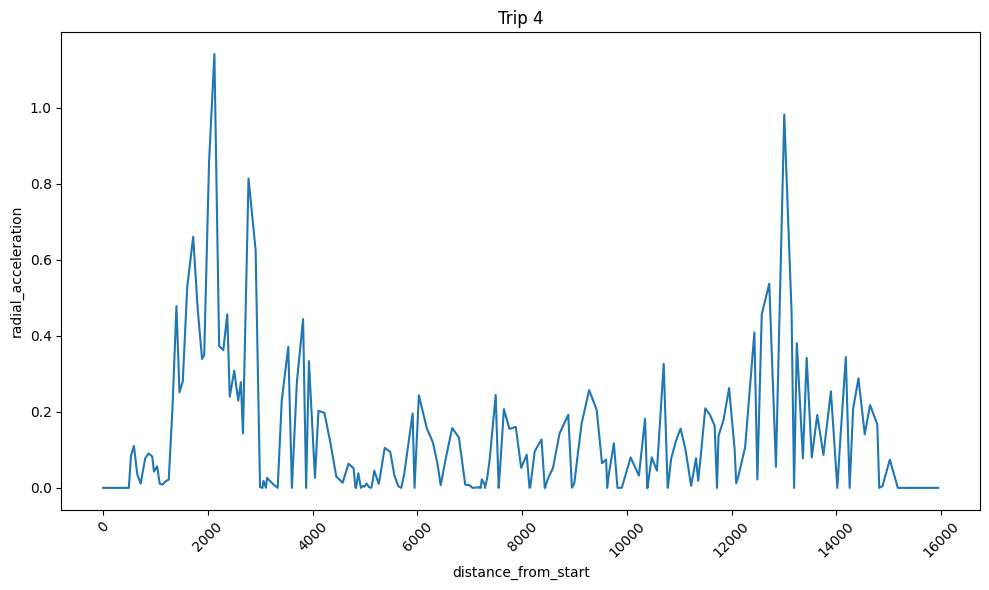

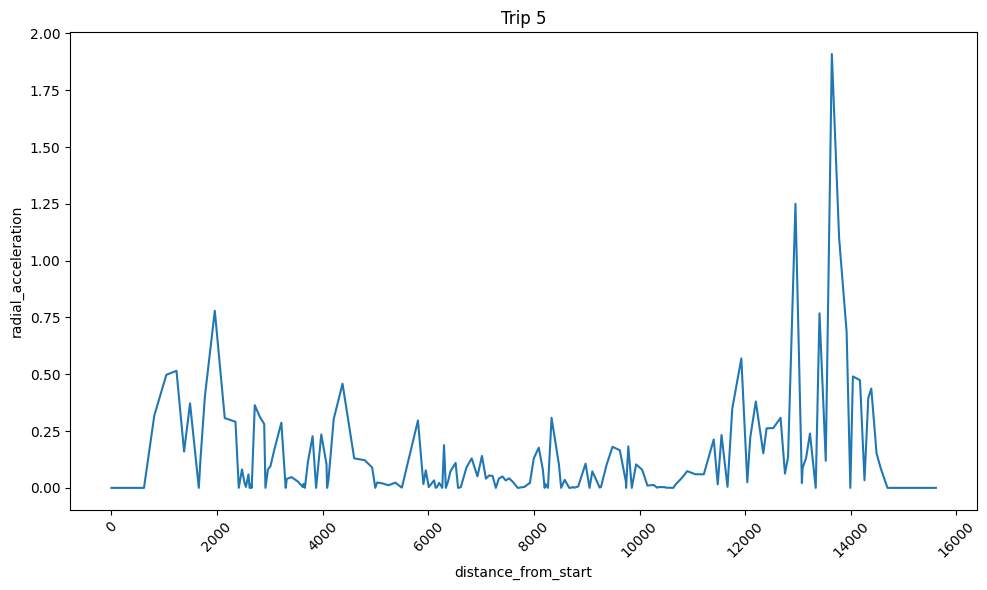

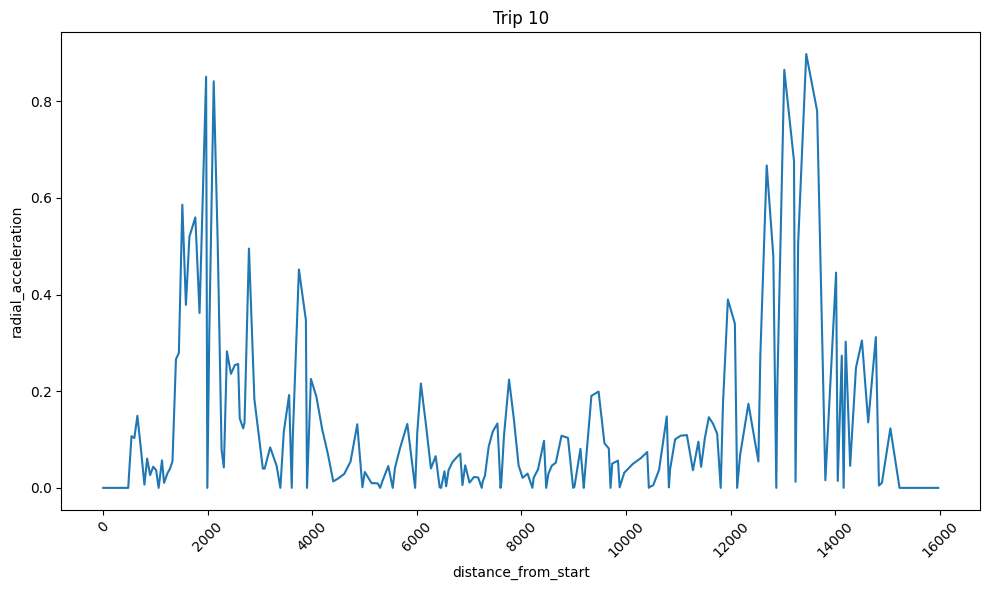

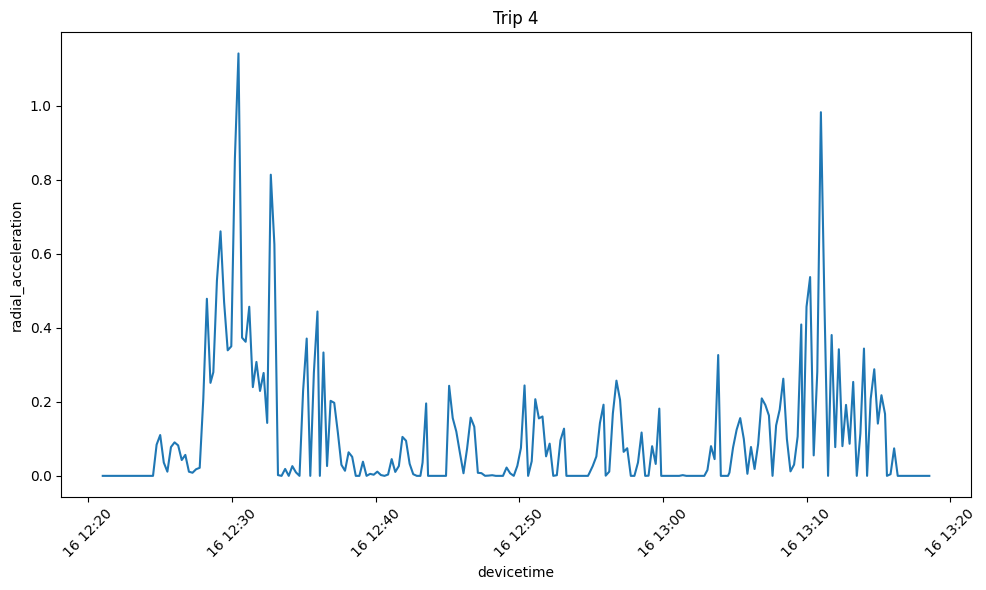

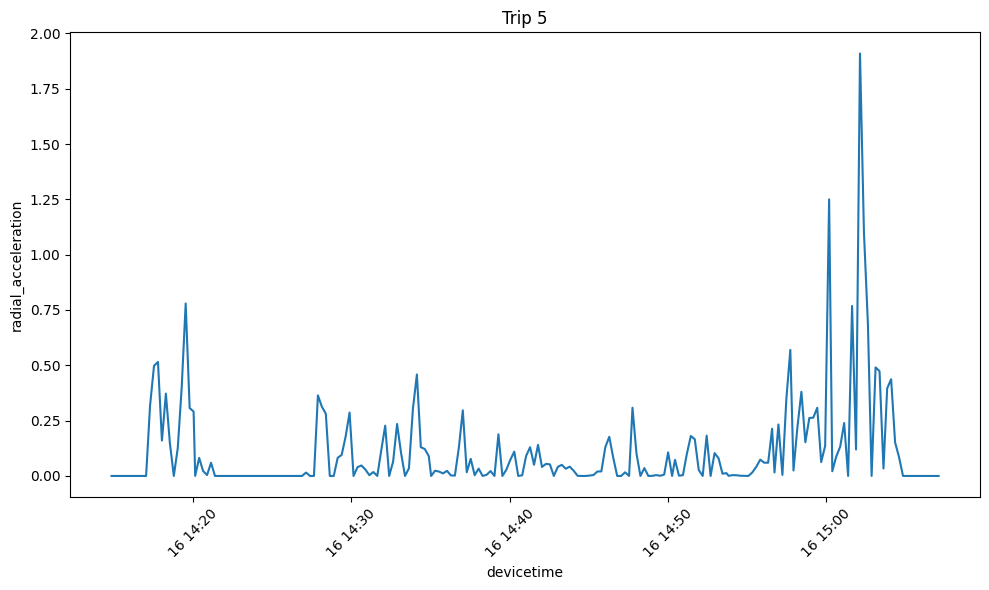

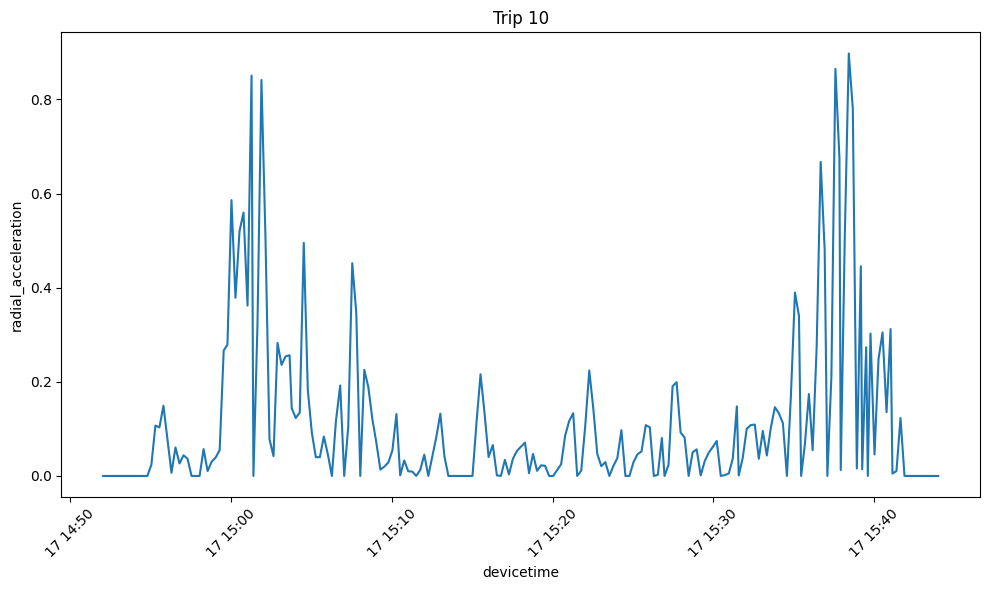

In [63]:
drawAgainst(4,'distance_from_start','radial_acceleration')
drawAgainst(5,'distance_from_start','radial_acceleration')
drawAgainst(10,'distance_from_start','radial_acceleration')

print("=========================================================")

drawAgainst(4,'devicetime','radial_acceleration')
drawAgainst(5,'devicetime','radial_acceleration')
drawAgainst(10,'devicetime','radial_acceleration')

Seem like distance is better

## Cluster Test

In [ ]:
datain_one_direction=data[data['direction']==1]
data_to_cluster=datain_one_direction[['deviceid','speed','acceleration','radial_acceleration']]

In [ ]:

# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the 'bus_stop' column
# data_to_cluster['bus_stop'] = label_encoder.fit_transform(data_to_cluster['bus_stop'])

# # Display the encoded DataFrame
# print(data_to_cluster)


In [ ]:
data_to_cluster

In [ ]:
# group by device_id by getting the mean value of speed
# data_to_cluster_mean=data_to_cluster.groupby('deviceid')['speed'].mean().reset_index()

# reset index
data_to_cluster=data_to_cluster.reset_index(drop=True)

features_only_df = data_to_cluster[['speed', 'acceleration', 'radial_acceleration']]


In [ ]:
features_only_df

In [ ]:
# print all the column names
print(features_only_df.columns)

In [ ]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Assuming you have your preprocessed data in 'data_to_cluster_mean'

# # List to store distortion values
# distortions = []

# # Choose a range of cluster counts to try
# cluster_range = range(1, 11)

# # Calculate distortion for each cluster count
# for num_clusters in cluster_range:
#     kmeans = KMeans(n_clusters=num_clusters, random_state=0)
#     kmeans.fit(data_to_cluster_mean)
#     distortions.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the nearest cluster center

# # Plot the elbow curve
# plt.plot(cluster_range, distortions, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Distortion')
# plt.title('Elbow Method')
# plt.show()


In [ ]:
nan_counts = features_only_df.isna().sum()
print(nan_counts)


In [ ]:
import pandas as pd

# Count Infinity values in each column
infinity_count = data.isin([np.inf, -np.inf]).sum()

print("Number of Infinity values in each column:")
print(infinity_count)


In [ ]:
# Sort the DataFrame by 'acceleration' column in descending order
sorted_df = features_only_df.sort_values(by='acceleration', ascending=False)

print("DataFrame with largest 'acceleration' values at the top:")
print(sorted_df)


In [ ]:
features_only_df

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose the number of clusters
num_clusters = 4

# Initialize the clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the algorithm to your data
kmeans.fit(features_only_df)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Add cluster labels to your original dataset
data_with_clusters = pd.DataFrame(features_only_df, columns=['speed', 'acceleration', 'radial_acceleration'])
data_with_clusters['cluster'] = cluster_labels
data_with_clusters['deviceid'] = data_to_cluster['deviceid']  # Add 'deviceid' column from data_to_cluster

# Visualize the clusters (for 2D data)
plt.scatter(data_with_clusters['deviceid'], data_with_clusters['speed'], c=cluster_labels, cmap='viridis')
plt.xlabel('deviceid')
plt.ylabel('speed')
plt.title('Cluster Visualization')
plt.show()


In [ ]:
def draw_clusters(data_with_clusters,x_axis,y_axis):
    # Visualize the clusters (for 2D data)
    plt.scatter(data_with_clusters[x_axis], data_with_clusters[y_axis], c=cluster_labels, cmap='viridis')
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=100, c='red')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title('Cluster Visualization')
    plt.show()


In [ ]:
draw_clusters(data_with_clusters,'deviceid','speed')
draw_clusters(data_with_clusters,'deviceid','acceleration')
draw_clusters(data_with_clusters,'deviceid','radial_acceleration')

In [ ]:
import matplotlib.pyplot as plt

# Calculate average values for each cluster
average_values = data_with_clusters.groupby('cluster').mean()

# Plot bar graph for Average Speed
plt.bar(average_values.index, average_values['speed'])
plt.xlabel('Cluster')
plt.ylabel('Average Speed')
plt.title('Average Speed by Cluster')
plt.xticks(average_values.index)
plt.show()

# Plot bar graph for Average Acceleration
plt.bar(average_values.index, average_values['acceleration'])
plt.xlabel('Cluster')
plt.ylabel('Average Acceleration')
plt.title('Average Acceleration by Cluster')
plt.xticks(average_values.index)
plt.show()

# Plot bar graph for Average Radial Acceleration
plt.bar(average_values.index, average_values['radial_acceleration'])
plt.xlabel('Cluster')
plt.ylabel('Average Radial Acceleration')
plt.title('Average Radial Acceleration by Cluster')
plt.xticks(average_values.index)
plt.show()


In [ ]:
# create a dataframe group by device id and taking the mode of cluster column in data_with_clusters dataframe
cluster_df=data_with_clusters.groupby('deviceid')['cluster'].agg(pd.Series.mode).reset_index()

In [ ]:
cluster_df


In [ ]:
data

In [ ]:
# in data dataframe, select all the raws within a given date around a 5 minitues time interval around a given time
data['devicetime']=pd.to_datetime(data['devicetime'])

# Given date and time
given_date = '2021-10-16'
given_time = '08:03:04'

# Convert given time to datetime format
given_datetime = pd.to_datetime('2021-10-27 14:50:45')

# Calculate time range for the interval
time_range = pd.to_timedelta('1 minutes')

# Filter rows within the time interval around the given time
selected_rows = data[
    (data['devicetime'] >= (given_datetime - time_range)) &
    (data['devicetime'] <= (given_datetime + time_range))
]




In [ ]:
selected_rows

## Time serious cluster test

## Visulaise bus running on map

In [ ]:
!pip install folium ipywidgets pandas


In [ ]:
pip install ipywidgets


In [ ]:
import folium
import pandas as pd
from ipywidgets import interact, IntSlider



# Convert timestamp column to datetime format
data['devicetime'] = pd.to_datetime(data['devicetime'])


In [ ]:
data['devicetime'].min()

In [ ]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_geocoder")

# Get the location coordinates (latitude, longitude) for Kandy
Nattarampota_location = geolocator.geocode("Nattarampota, Sri Lanka")
Nattarampota_latitude = Nattarampota_location.latitude
Nattarampota_longitude = Nattarampota_location.longitude

print("Latitude:", Nattarampota_latitude, "Longitude:", Nattarampota_longitude)
Nattarampota_location = [Nattarampota_latitude, Nattarampota_longitude]  # Kandy city location

In [ ]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_geocoder")

# Get the location coordinates (latitude, longitude) for Kandy
kandy_location = geolocator.geocode("Kandy, Sri Lanka")
kandy_latitude = kandy_location.latitude
kandy_longitude = kandy_location.longitude

print("Latitude:", kandy_latitude, "Longitude:", kandy_longitude)
Kandy_location = [kandy_latitude, kandy_longitude]  # Kandy city location

In [ ]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_geocoder")

# Get the location coordinates (latitude, longitude) for digana
digana_location = geolocator.geocode("Digana, Sri Lanka")
digana_latitude = digana_location.latitude
digana_longitude = digana_location.longitude

print("Latitude:", digana_latitude, "Longitude:", digana_longitude)
digana_location = [digana_latitude, digana_longitude]  # Kandy city location

In [ ]:
data.head(20)

In [ ]:
import folium
import pandas as pd
from shapely.geometry import Point
from ipywidgets import FloatSlider, interact, Label, Output, VBox, Button, HBox

# Assuming you have 'data' DataFrame containing bus data

# Dictionary to store last known location of each bus
bus_locations = {}

# Create Point geometries for Kandy and Digana
kandy_location = Point(kandy_latitude, kandy_longitude)
digana_location = Point(digana_latitude, digana_longitude)  # Define the coordinates for Digana

def create_map():
    return folium.Map(location=Nattarampota_location, zoom_start=14)

def update_map(timestamp):
    m = create_map()  # Create a new map instance each time
    interval = pd.Timedelta(seconds=15)
    timestamp_dt = pd.Timestamp.fromtimestamp(timestamp)  # Convert timestamp to pandas Timestamp
    interval_start = timestamp_dt - interval / 2
    interval_end = timestamp_dt + interval / 2

    bus_data_within_interval = data[(data['devicetime'] >= interval_start) & (data['devicetime'] <= interval_end)]
    bus_data_within_interval = bus_data_within_interval.sort_values(by='devicetime', ascending=False)
    unique_buses = data['deviceid'].unique()

    for deviceid in unique_buses:
        latest_data_for_bus = None  # Initialize the variable here

        bus_data_for_bus = bus_data_within_interval[bus_data_within_interval['deviceid'] == deviceid]
        if len(bus_data_for_bus) > 0:
            latest_data_for_bus = bus_data_for_bus.iloc[0]
            bus_location = [latest_data_for_bus['latitude'], latest_data_for_bus['longitude']]
            bus_locations[deviceid] = bus_location
        else:
            bus_location = bus_locations.get(deviceid)

        if bus_location is not None:
            bus_point = Point(bus_location[0], bus_location[1])

            # Adjust the color using a consistent formula
            color = "#{:06x}".format(deviceid + 100000)

            # get speed acceleration and radial acceleration into three variables
            if latest_data_for_bus is not None:
                speed = latest_data_for_bus['speed']
                acceleration = latest_data_for_bus['acceleration']
                radial_acceleration = latest_data_for_bus['radial_acceleration']
                print(speed, acceleration, radial_acceleration)
            else:
                speed = 0
                acceleration = 0
                radial_acceleration = 0

            folium.Marker(
                location=bus_location,
                popup=[deviceid, speed, acceleration, radial_acceleration],
                color=color  # Use the calculated color
            ).add_to(m)

    return m

min_timestamp = data['devicetime'].min()
max_timestamp = data['devicetime'].max()

# Calculate step size in seconds
step_size_seconds = 15
slider = FloatSlider(value=min_timestamp.timestamp(), min=min_timestamp.timestamp(), max=max_timestamp.timestamp(), step=step_size_seconds)

# Adjust the length of the slider using CSS style
slider.style.handle_length = '500px'  # Adjust the length as desired

time_label = Label(value=pd.Timestamp.fromtimestamp(slider.value).strftime('%Y-%m-%d %H:%M:%S'))

def update_time_label(change):
    time_label.value = pd.Timestamp.fromtimestamp(change['new']).strftime('%Y-%m-%d %H:%M:%S')

slider.observe(update_time_label, 'value')

stop = False  # Declare stop as a global variable

# Button to stop continuous play
def stop_continuous(_):
    global stop
    stop = True
    
# Button to move slider left
def move_left(_):
    slider.value -= step_size_seconds

# Button to move slider right
def move_right(_):
    slider.value += step_size_seconds

# Button to move slider left continuously
def move_left_continuous(_):
    while slider.value > slider.min and not stop:
        slider.value -= step_size_seconds

# Button to move slider right continuously
def move_right_continuous(_):
    while slider.value < slider.max and not stop:
        slider.value += step_size_seconds





left_button = Button(description='<<', icon='angle-left')
right_button = Button(description='>>', icon='angle-right')
left_continuous_button = Button(description='Continuous <<', icon='step-backward')
right_continuous_button = Button(description='Continuous >>', icon='step-forward')
stop_button = Button(description='Stop', icon='stop')

left_button.on_click(move_left)
right_button.on_click(move_right)
left_continuous_button.on_click(move_left_continuous)
right_continuous_button.on_click(move_right_continuous)
stop_button.on_click(stop_continuous)

buttons_row = HBox([left_button, left_continuous_button, right_button, right_continuous_button, stop_button])
controls_box = VBox([buttons_row, slider, time_label])

out_map = Output()
out_map.layout.height = '600px'  # Adjust the height as desired

def update_map_output(change):
    with out_map:
        out_map.clear_output(wait=True)
        display(update_map(slider.value))

slider.observe(update_map_output, 'value')

app_layout = VBox([controls_box, out_map])

display(app_layout)
